In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from spellchecker import SpellChecker
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

In [3]:
# Đọc file
file_path = r"C:\Users\DO TUAN MINH\Desktop\ben\Learn\Reddit_Sentiment_Analysis\dataframe\comments_data.csv"  
df = pd.read_csv(file_path)

# Khởi tạo công cụ
analyzer = SentimentIntensityAnalyzer()

# Phân tích cảm xúc
def analyze_comment(comment):
    score = analyzer.polarity_scores(str(comment))['compound']
    sentiment = "Positive" if score >= 0.05 else "Negative" if score <= -0.05 else "Neutral"
    return sentiment, score

# Áp dụng trực tiếp lên dataframe
tqdm.pandas(desc="Processing Sentiment")
df[["Sentiment", "Compound"]] = df["comment_text"].progress_apply(lambda x: analyze_comment(x)).apply(pd.Series)

print("Hoàn thành xử lý!")


Processing Sentiment: 100%|██████████| 186304/186304 [00:05<00:00, 31730.73it/s]


Hoàn thành xử lý!


In [5]:
df.to_csv("full_comments_sentiment_updated.csv")

In [6]:
df

,match_time,matchday,home_team,away_team,home_score,away_score,winner,referee,comment_id,post_id,comment_text,comment_time,comment_author,comment_score,comment_length,Sentiment,Compound
0,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7w2h,1etwv7n,I am ready I have my Gamst stream open,1.723835e+09,HowardBunnyColvin,1.0,38,Positive,0.3612
1,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7wlr,1etwv7n,Premier League is back!!!,1.723835e+09,NinjaGoalie97,3.0,25,Neutral,0.0000
2,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7wu5,1etwv7n,That sky advert was absolutely rotten. Melodra...,1.723835e+09,Ajax_Trees_Again,10.0,57,Negative,-0.5563
3,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7xl9,1etwv7n,Put it on at 7.30 whilst I made dinner and the...,1.723835e+09,tocitus,7.0,150,Positive,0.1260
4,2024-08-16 19:00,1,Manchester United,Fulham,1.0,0.0,Manchester United FC,Robert Jones,lig7ydl,1etwv7n,cam on fulham,1.723835e+09,SirBarkington,1.0,13,Neutral,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186299,2025-02-12 19:30,15,Everton,Liverpool,2.0,2.0,DRAW,Michael Oliver,mch5205,1inz7qb,You can tell this really is the best thing to ...,1.739411e+09,Footyfooty42069,-6.0,172,Positive,0.8797
186300,2025-02-12 19:30,15,Everton,Liverpool,2.0,2.0,DRAW,Michael Oliver,mcheprv,1inz7qb,"I know right, imagine going that mental over a...",1.739414e+09,Anonymous,1.0,52,Neutral,0.0000
186301,2025-02-12 19:30,15,Everton,Liverpool,2.0,2.0,DRAW,Michael Oliver,mchk4nd,1inz7qb,ChadTheGooner with a Man U flair commenting ab...,1.739416e+09,bob-noxious,1.0,151,Positive,0.3415
186302,2025-02-12 19:30,15,Everton,Liverpool,2.0,2.0,DRAW,Michael Oliver,mciv7os,1inz7qb,Everton have always been my 4th team,1.739439e+09,ChadTheGooner,1.0,36,Neutral,0.0000


[nltk_data] Downloading package vader_lexicon to C:\Users\DO TUAN
[nltk_data]     MINH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


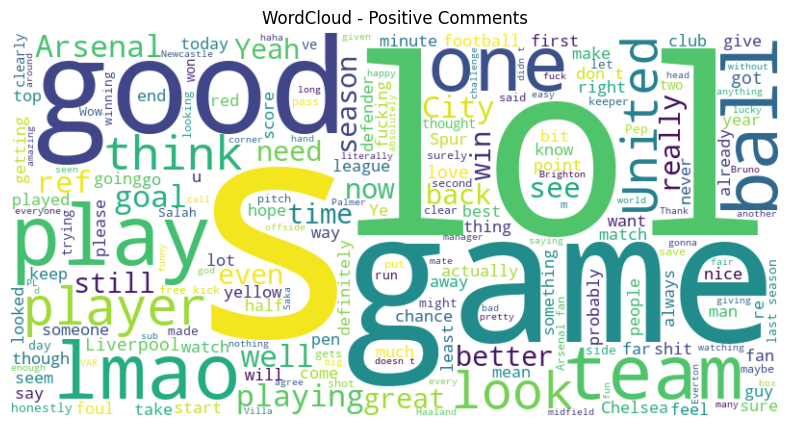

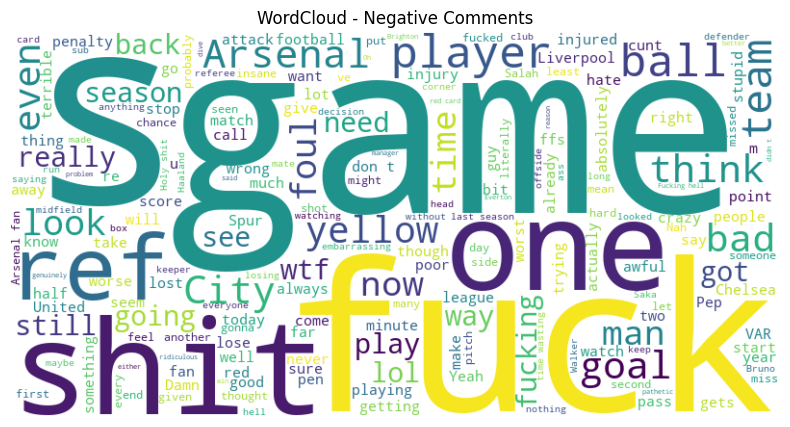

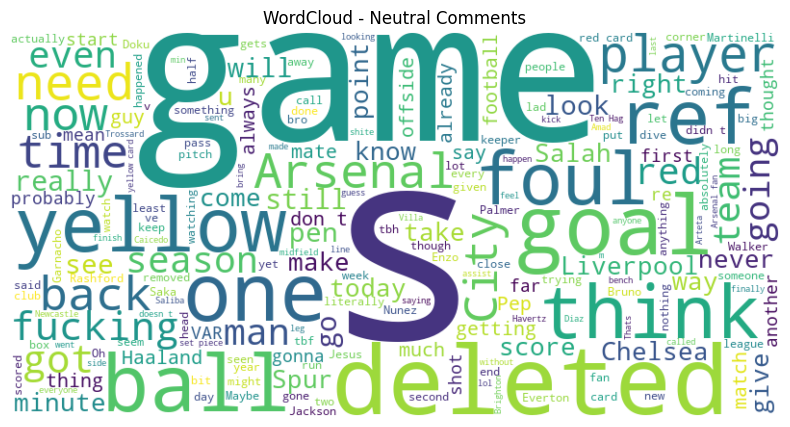

In [14]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tải mô hình VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Đọc dữ liệu
# df = pd.read_csv("your_comments.csv")  # Thay bằng tên file CSV của bạn

# # Đánh giá cảm xúc bằng VADER
# def get_sentiment(text):
#     score = sia.polarity_scores(text)['compound']
#     if score >= 0.05:
#         return 'positive'
#     elif score <= -0.05:
#         return 'negative'
#     else:
#         return 'neutral'

# df["sentiment"] = df["comment"].astype(str).apply(get_sentiment)

# Tạo WordCloud cho từng loại cảm xúc
def generate_wordcloud(sentiment):
    text = " ".join(df[df["Sentiment"] == sentiment]["comment_text"].dropna().astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud - {sentiment.capitalize()} Comments")
    plt.show()

# Hiển thị WordCloud cho từng nhóm
for s in ['Positive', 'Negative', 'Neutral']:
    generate_wordcloud(s)


In [13]:
print(df["comment_text"].dtype)  # Xem kiểu dữ liệu của cột comment_text
print(df[df["comment_text"].isna()])  # Xem dòng bị NaN


object
              match_time  matchday                home_team  \
18699                NaN         2              Southampton   
42699                NaN         5              Aston Villa   
42700                NaN         5                   Fulham   
78708                NaN         8                   Fulham   
79664                NaN         8         Newcastle United   
81413   2024-10-19 16:30         8            A Bournemouth   
89023                NaN         9              Aston Villa   
89455                NaN         9                  Chelsea   
104806               NaN        11  Wolverhampton Wanderers   
115085               NaN        12              Aston Villa   
123879               NaN        13           Crystal Palace   
140592               NaN        15             Ipswich Town   
147953               NaN        16  Wolverhampton Wanderers   
151891  2024-12-15 16:30        16          Manchester City   
158383               NaN        17          West

In [27]:
# Chọn 10 dòng ngẫu nhiên
sample_df = df.sample(n=10)

# Hiển thị kết quả
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)  # Không giới hạn độ rộng của cột
print(sample_df[['comment_text', 'Sentiment']])

                                                         comment_text  \
142759                      lol small price to pay if that’s the case   
183161                             Only fouls against Liverpool then.   
32876          I was only joking I'm not sure why they have the bands   
169685                         GET YOUR FUCKING HWANGS OUT LADSSSSSSS   
152301  Im irate about that. He just launches his body across Hojlund   
134098                                            Jover is inevitable   
91871                                                       get a job   
24626                                Nah just admit you hadn’t a clue   
27971                          You were born in America buddy 😂😂😂😂😂😂😂   
134292                                            Oh theres zinchenko   

       Sentiment  
142759  Positive  
183161   Neutral  
32876    Neutral  
169685   Neutral  
152301  Negative  
134098   Neutral  
91871    Neutral  
24626   Positive  
27971   Positive  
134292

In [31]:
print(df.head())

         match_time  matchday          home_team away_team  home_score  \
0  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
1  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
2  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
3  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
4  2024-08-16 19:00         1  Manchester United    Fulham         1.0   

   away_score                winner       referee comment_id  post_id  \
0         0.0  Manchester United FC  Robert Jones    lig7w2h  1etwv7n   
1         0.0  Manchester United FC  Robert Jones    lig7wlr  1etwv7n   
2         0.0  Manchester United FC  Robert Jones    lig7wu5  1etwv7n   
3         0.0  Manchester United FC  Robert Jones    lig7xl9  1etwv7n   
4         0.0  Manchester United FC  Robert Jones    lig7ydl  1etwv7n   

                                                                                                                    

In [32]:
from textblob import TextBlob

# Câu có lỗi chính tả
text = "I am not so hapy with the match."

# Phân tích cảm xúc trực tiếp
blob = TextBlob(text)
print(blob.sentiment)
# Sửa chính tả trước khi phân tích cảm xúc
corrected_text = TextBlob(text).correct()

# Phân tích cảm xúc sau khi sửa
corrected_blob = TextBlob(str(corrected_text))
print(corrected_blob.sentiment)


Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=1.0)


Sentiment
Positive    69970
Neutral     61948
Negative    54386
Name: count, dtype: int64


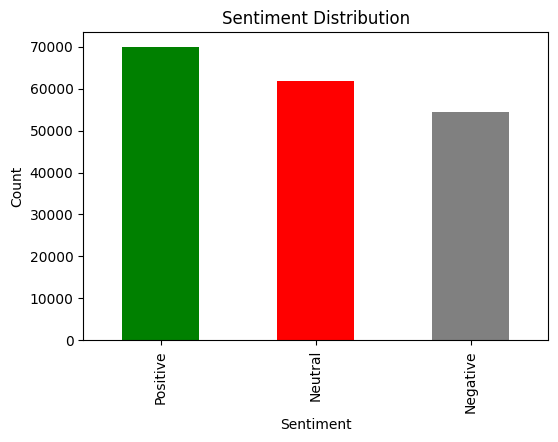

In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Đọc dữ liệu

# Đếm số lượng từng loại sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Hiển thị kết quả
print(sentiment_counts)

# Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()


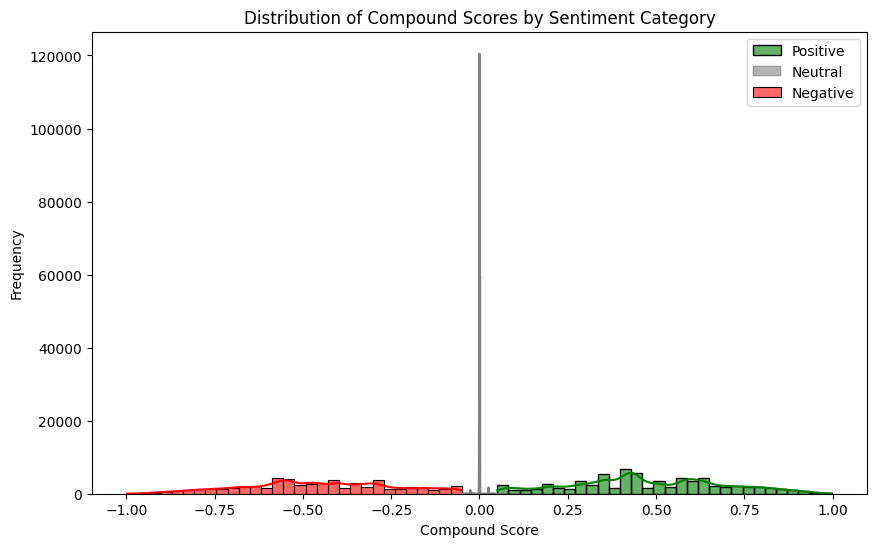

In [6]:


# Vẽ histogram phân bố compound score cho từng loại sentiment
plt.figure(figsize=(10, 6))

sns.histplot(df[df['Sentiment'] == 'Positive']['Compound'], bins=30, kde=True, color='green', label='Positive', alpha=0.6)
sns.histplot(df[df['Sentiment'] == 'Neutral']['Compound'], bins=30, kde=True, color='gray', label='Neutral', alpha=0.6)
sns.histplot(df[df['Sentiment'] == 'Negative']['Compound'], bins=30, kde=True, color='red', label='Negative', alpha=0.6)

plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.title("Distribution of Compound Scores by Sentiment Category")
plt.legend()
plt.show()


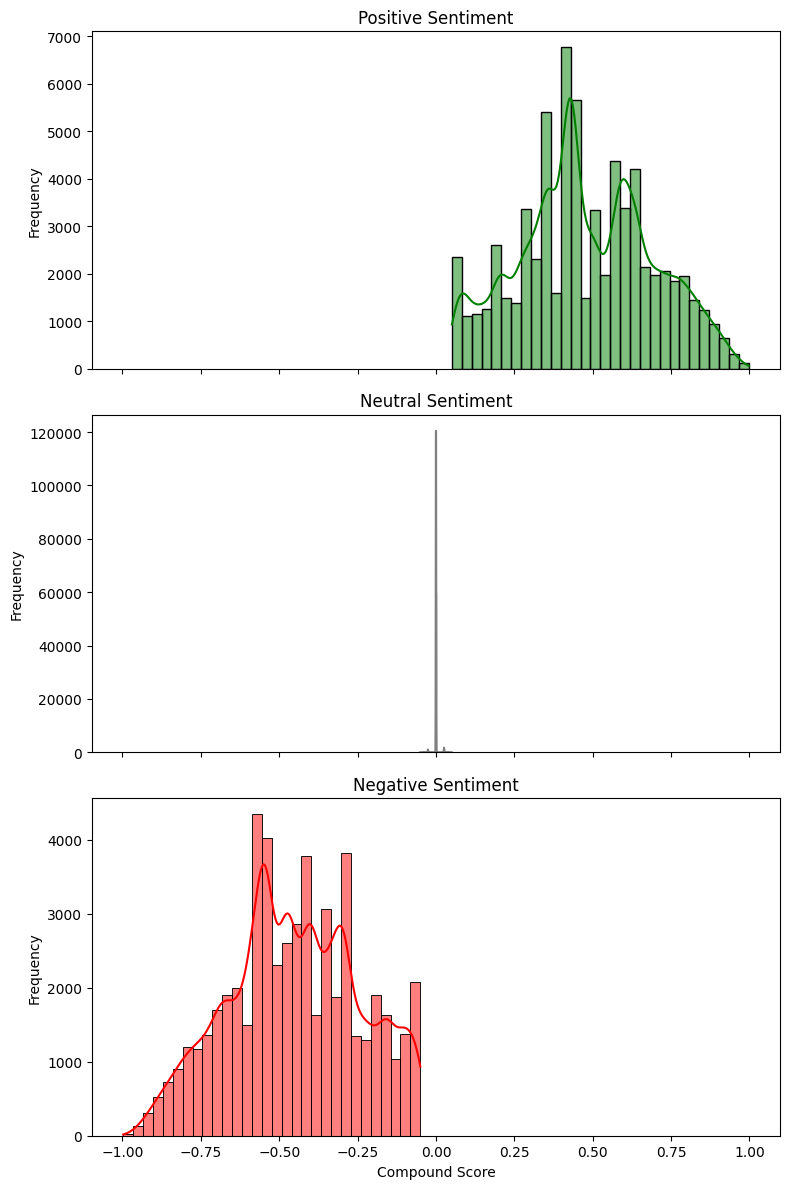

In [8]:

# Tạo 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Vẽ histogram cho từng loại sentiment
sns.histplot(df[df['Sentiment'] == 'Positive']['Compound'], bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title("Positive Sentiment")
axes[0].set_ylabel("Frequency")

sns.histplot(df[df['Sentiment'] == 'Neutral']['Compound'], bins=30, kde=True, color='gray', ax=axes[1])
axes[1].set_title("Neutral Sentiment")
axes[1].set_ylabel("Frequency")

sns.histplot(df[df['Sentiment'] == 'Negative']['Compound'], bins=30, kde=True, color='red', ax=axes[2])
axes[2].set_title("Negative Sentiment")
axes[2].set_xlabel("Compound Score")
axes[2].set_ylabel("Frequency")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
